In [25]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [52]:
# Load the data from the CSV file
df = pd.read_csv("BA_reviews.csv",sep='|',skiprows=1, header=None, names=['status',  'reviews'])



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavsrinivasvenkatesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df.head(10)

,status,reviews
0,"0,""✅ Trip Verified",If you can’t fly First Class don’t fly Britis...
1,"1,Not Verified",Singapore to Heathrow. Business class on an...
2,"2,Not Verified",I reported my damaged/ruined suitcase 5 wee...
3,"3,""Not Verified","On March 1st, I flew from Berlin to São Pau..."
4,"4,""Not Verified",The WORST customer experience! British Airway...
5,"5,""Not Verified",Had to cancel my flight months in advance d...
6,"6,""✅ Trip Verified",Flight cancelled with no reason given less th...
7,"7,""✅ Trip Verified",This is a route I fly regularly. Used first c...
8,"8,""✅ Trip Verified",While BA may have made some positive improve...
9,"9,""✅ Trip Verified",British Airways new Club Suite is a marked im...


In [53]:
# Remove tick mark directly in the DataFrame
df['status'] = df['status'].str.replace('✅ ', '', regex=False)

In [54]:
# Apply the cleaning function to the text column
df['reviews'] = df['reviews'].apply(clean_text)


In [55]:
df.head(100)


,status,reviews
0,"0,""Trip Verified",If you can’t fly First Class don’t fly Britis...
1,"1,Not Verified",Singapore to Heathrow. Business class on an...
2,"2,Not Verified",I reported my damaged/ruined suitcase 5 wee...
3,"3,""Not Verified","On March 1st, I flew from Berlin to São Pau..."
4,"4,""Not Verified",The WORST customer experience! British Airway...
5,"5,""Not Verified",Had to cancel my flight months in advance d...
6,"6,""Trip Verified",Flight cancelled with no reason given less th...
7,"7,""Trip Verified",This is a route I fly regularly. Used first c...
8,"8,""Trip Verified",While BA may have made some positive improve...
9,"9,""Trip Verified",British Airways new Club Suite is a marked im...


In [58]:
# Remove any status apart from "Trip Verified" and "Not Verified"
df['status'] = df['status'].apply(lambda x: 'Trip Verified' if 'Trip Verified' in x else 'Not Verified')


In [59]:
df.head()

,status,reviews
0,Trip Verified,If you can’t fly First Class don’t fly Britis...
1,Not Verified,Singapore to Heathrow. Business class on an...
2,Not Verified,I reported my damaged/ruined suitcase 5 wee...
3,Not Verified,"On March 1st, I flew from Berlin to São Pau..."
4,Not Verified,The WORST customer experience! British Airway...


In [61]:
# Download NLTK data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to further clean the text data
def further_clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the further cleaning function
df['clean_text'] = df['reviews'].apply(further_clean_text)

# Display the first few rows to verify
print(df.head())

          status                                            reviews  \
0  Trip Verified   If you can’t fly First Class don’t fly Britis...   
1   Not Verified     Singapore to Heathrow. Business class on an...   
2   Not Verified     I reported my damaged/ruined suitcase 5 wee...   
3   Not Verified     On March 1st, I flew from Berlin to São Pau...   
4   Not Verified   The WORST customer experience! British Airway...   

                                          clean_text  
0  cant fly first class dont fly british airways ...  
1  singapore heathrow business class premium econ...  
2  reported damagedruined suitcase weeks ago im s...  
3  march st flew berlin paulo ba encountered seve...  
4  worst customer experience british airways ba e...  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavsrinivasvenkatesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
#!pip install textblob

python(62539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.2 MB/s eta 0:00:0000:0100:01


count    2015.000000
mean        0.067024
std         0.195592
min        -1.000000
25%        -0.044093
50%         0.064063
75%         0.178968
max         0.800000
Name: sentiment, dtype: float64


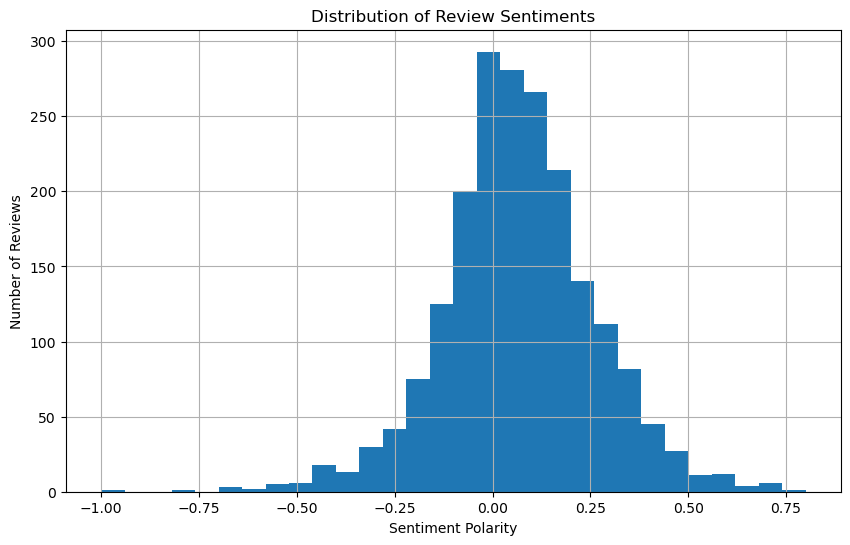

In [64]:
from textblob import TextBlob

# Sentiment Analysis
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display basic statistics of sentiment
print(df['sentiment'].describe())

# Plot the distribution of sentiment polarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Reviews')
plt.show()

In [67]:
df.head(10)


,status,reviews,clean_text,sentiment
0,Trip Verified,If you can’t fly First Class don’t fly Britis...,cant fly first class dont fly british airways ...,-0.100000
1,Not Verified,Singapore to Heathrow. Business class on an...,singapore heathrow business class premium econ...,-0.298810
2,Not Verified,I reported my damaged/ruined suitcase 5 wee...,reported damagedruined suitcase weeks ago im s...,-0.171429
3,Not Verified,"On March 1st, I flew from Berlin to São Pau...",march st flew berlin paulo ba encountered seve...,-0.042143
4,Not Verified,The WORST customer experience! British Airway...,worst customer experience british airways ba e...,0.009028
5,Not Verified,Had to cancel my flight months in advance d...,cancel flight months advance due change schedu...,0.135000
6,Trip Verified,Flight cancelled with no reason given less th...,flight cancelled reason given less h departure...,-0.424074
7,Trip Verified,This is a route I fly regularly. Used first c...,route fly regularly used first class security ...,0.265686
8,Trip Verified,While BA may have made some positive improve...,ba may made positive improvements club world p...,-0.075384
9,Trip Verified,British Airways new Club Suite is a marked im...,british airways new club suite marked improvem...,0.065820


# Sentiment distributions

<Figure size 1200x600 with 0 Axes>

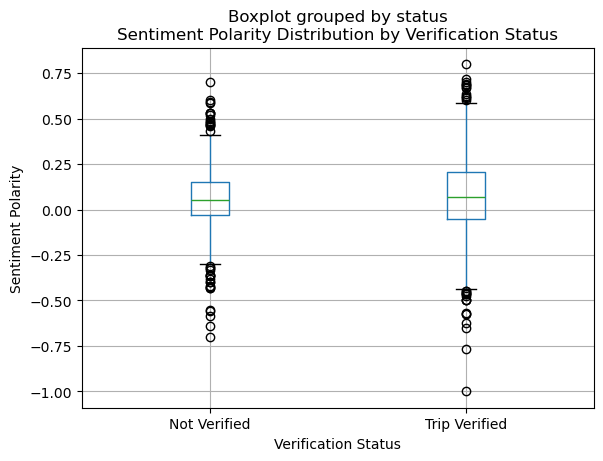

In [71]:
# Boxplot to compare sentiment distributions
plt.figure(figsize=(12, 6))
df.boxplot(column='sentiment', by='status')
plt.title('Sentiment Polarity Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Sentiment Polarity')
plt.show()


 # Correlating Sentiment with Review Length

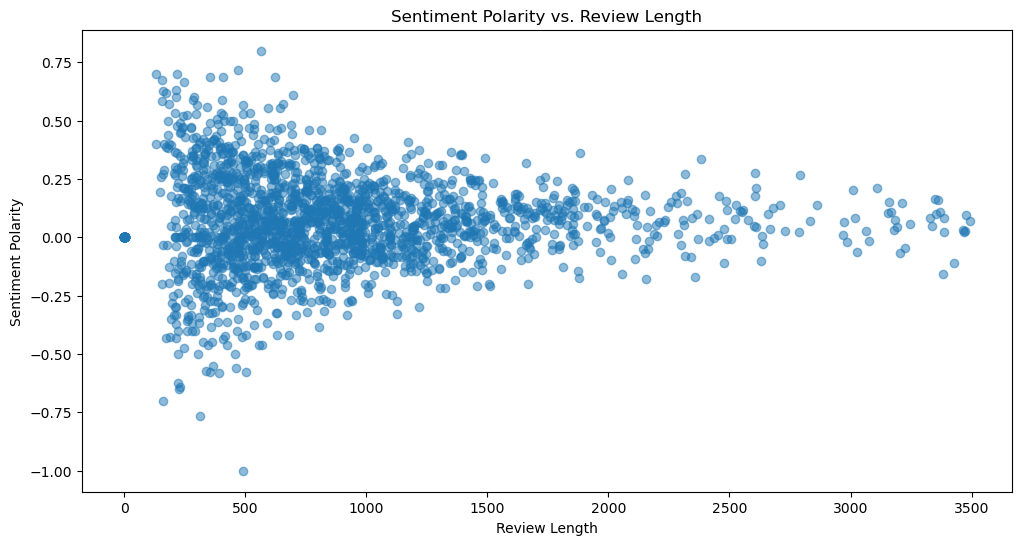

Correlation between review length and sentiment polarity: -0.006967074695405484


In [74]:
# Add a column for review length
df['review_length'] = df['reviews'].apply(len)

# Scatter plot to visualize the correlation
plt.figure(figsize=(12, 6))
plt.scatter(df['review_length'], df['sentiment'], alpha=0.5)
plt.title('Sentiment Polarity vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Polarity')
plt.show()

# Calculate the correlation coefficient
correlation = df['review_length'].corr(df['sentiment'])
print(f'Correlation between review length and sentiment polarity: {correlation}')


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the clean text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
flight seats class ba seat business airline london british airways service food economy cabin heathrow staff flights airlines passengers like
Topic 2:
flight crew food ba good service cabin time london seat class business seats meal club lounge aircraft boarding drinks heathrow
Topic 3:
seat ba economy seats flight class premium business plane boarding staff check passengers food london meal told airline cabin service
Topic 4:
flight ba london british airways hours airport told time luggage heathrow day service cancelled flights delayed hour staff customer bag
Topic 5:
ba service customer flight british airways airline staff class business told asked london fly seat travel time customers seats cabin


In [79]:
#!pip install wordcloud


Common words in positive reviews: [('flight', 2537), ('ba', 1784), ('service', 1067), ('london', 898), ('good', 843), ('crew', 835), ('food', 815), ('time', 777), ('seat', 735), ('cabin', 702), ('class', 671), ('seats', 641), ('british', 624), ('airways', 619), ('business', 586), ('would', 584), ('one', 567), ('staff', 558), ('heathrow', 546), ('get', 531)]
Common words in negative reviews: [('flight', 1215), ('ba', 817), ('service', 497), ('london', 451), ('seat', 372), ('british', 348), ('airways', 339), ('class', 333), ('food', 313), ('one', 300), ('business', 294), ('seats', 290), ('time', 285), ('us', 282), ('heathrow', 270), ('airline', 269), ('hours', 267), ('staff', 264), ('get', 242), ('crew', 233)]


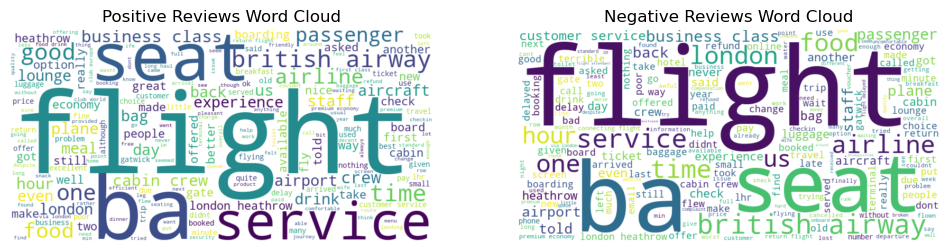

In [80]:
from collections import Counter
from wordcloud import WordCloud

# Function to extract common words
def get_common_words(texts):
    all_words = ' '.join(texts)
    word_list = all_words.split()
    return Counter(word_list).most_common(20)

# Get common words in positive and negative reviews
positive_reviews = df[df['sentiment'] > 0]['clean_text']
negative_reviews = df[df['sentiment'] < 0]['clean_text']

positive_common_words = get_common_words(positive_reviews)
negative_common_words = get_common_words(negative_reviews)

print("Common words in positive reviews:", positive_common_words)
print("Common words in negative reviews:", negative_common_words)

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.show()


/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_27396/948282909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['aspect_sentiment'] = aspect_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


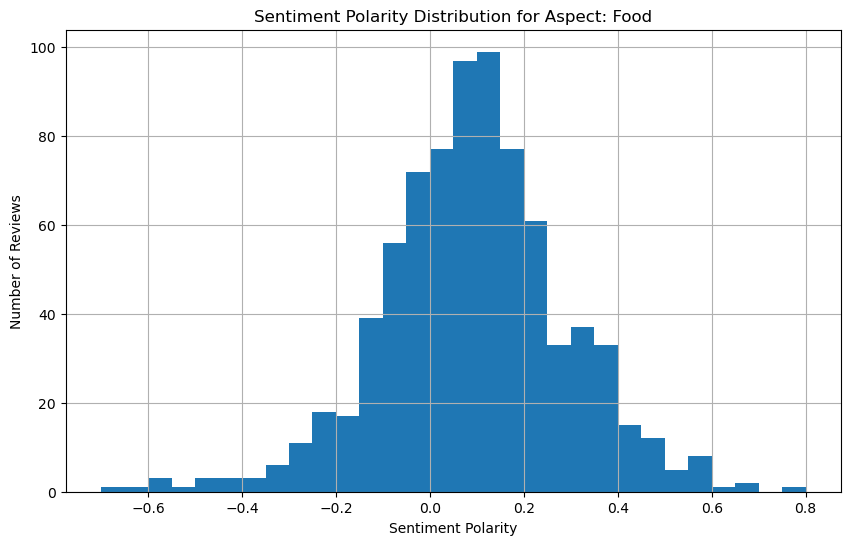

/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_27396/948282909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['aspect_sentiment'] = aspect_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


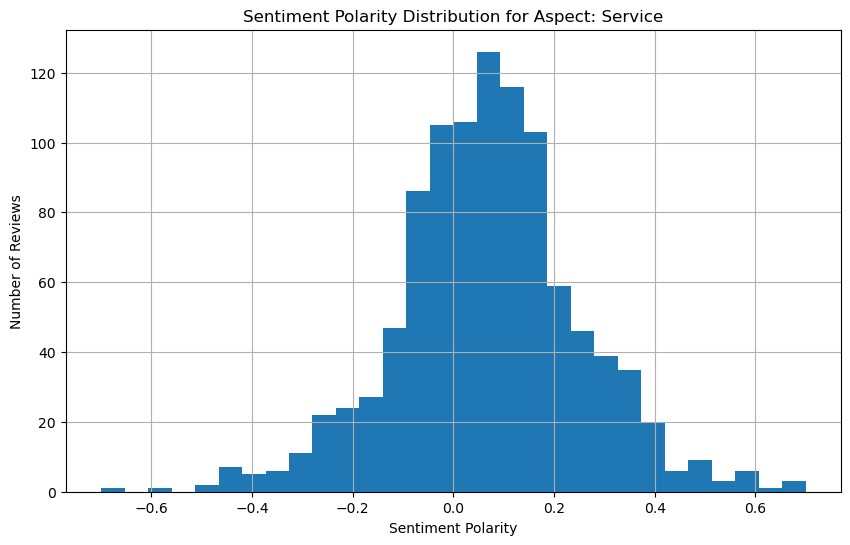

/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_27396/948282909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['aspect_sentiment'] = aspect_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


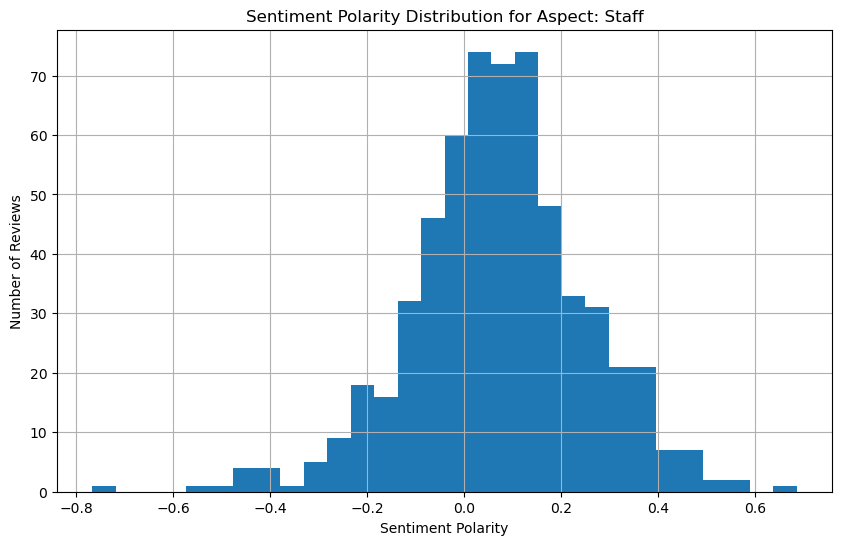

/var/folders/14/ljpzpqp91g1dpqy4sw00h0vm0000gn/T/ipykernel_27396/948282909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aspect_df['aspect_sentiment'] = aspect_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


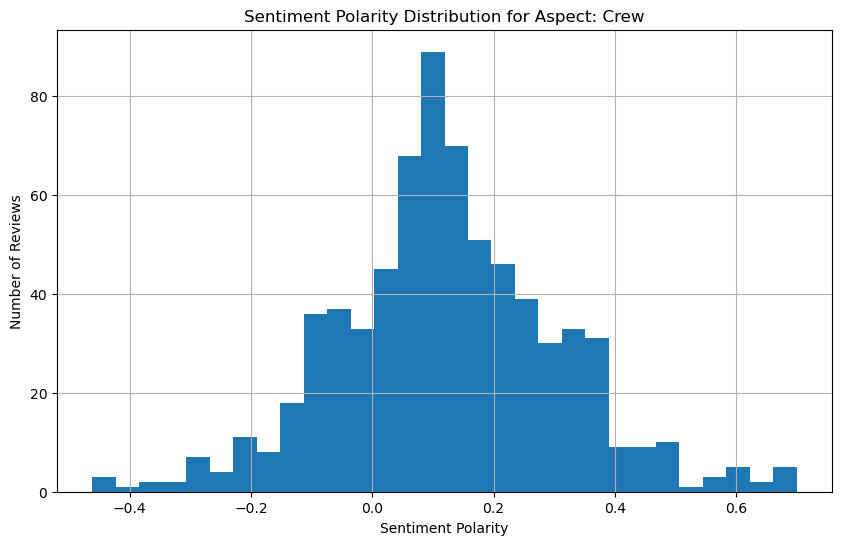

Sentiment summary for Food:
count    792.000000
mean       0.093484
std        0.196488
min       -0.700000
25%       -0.026197
50%        0.090711
75%        0.207853
max        0.800000
Name: aspect_sentiment, dtype: float64

Sentiment summary for Service:
count    1022.000000
mean        0.069622
std         0.182705
min        -0.700000
25%        -0.037500
50%         0.070581
75%         0.169960
max         0.700000
Name: aspect_sentiment, dtype: float64

Sentiment summary for Staff:
count    591.000000
mean       0.072063
std        0.181694
min       -0.766667
25%       -0.030732
50%        0.073333
75%        0.174180
max        0.686538
Name: aspect_sentiment, dtype: float64

Sentiment summary for Crew:
count    708.000000
mean       0.124626
std        0.183097
min       -0.461905
25%        0.012689
50%        0.115203
75%        0.235272
max        0.700000
Name: aspect_sentiment, dtype: float64



In [82]:
# Function to analyze sentiment for a specific aspect
def aspect_sentiment(aspect, df):
    aspect_df = df[df['clean_text'].str.contains(aspect)]
    aspect_df['aspect_sentiment'] = aspect_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    return aspect_df

# Analyze sentiment for each aspect
aspects = ['food', 'service', 'staff','crew']
aspect_sentiments = {}

for aspect in aspects:
    aspect_df = aspect_sentiment(aspect, df)
    aspect_sentiments[aspect] = aspect_df['aspect_sentiment'].describe()
    # Plot the aspect sentiment distribution
    plt.figure(figsize=(10, 6))
    aspect_df['aspect_sentiment'].hist(bins=30)
    plt.title(f'Sentiment Polarity Distribution for Aspect: {aspect.capitalize()}')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Number of Reviews')
    plt.show()

# Print the summary of aspect sentiments
for aspect, sentiment_summary in aspect_sentiments.items():
    print(f"Sentiment summary for {aspect.capitalize()}:\n{sentiment_summary}\n")